# Kilian COLLET ####

# TP 1 ####

### I. Réduction de dimensions et Visualisation des données ####

In [1]:
# Villes ####

In [2]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
# Question 1

In [4]:
data1 = pd.read_csv('./villes.csv', sep=';') #importation des données
X1 = data1.iloc[:, 1:13].values
labels1 = data1.iloc[:, 0].values

In [5]:
data1.head() #première visualisation

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
3,besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
4,biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2


In [6]:
# Question 2

In [7]:
from sklearn.preprocessing import StandardScaler
x1 = StandardScaler().fit_transform(X1) #normalizing the features

In [8]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=0.9) #modèle
X_pca1 = pca1.fit_transform(x1) #fit
print(pca1.explained_variance_ratio_) #affichage de la variance expliquée par nos deux composantes

[0.87268193 0.11720602]


In [9]:
pca1.components_ #affichage des vecteurs composantes

array([[ 0.27151028,  0.28846164,  0.3010811 ,  0.30354174,  0.28353089,
         0.27841907,  0.27290295,  0.28757774,  0.30472022,  0.3038548 ,
         0.29242808,  0.2729549 ],
       [ 0.39933494,  0.29907184,  0.12943051, -0.11530598, -0.32314291,
        -0.35846763, -0.38879639, -0.3010133 , -0.11231622,  0.12249226,
         0.26269461,  0.38693688]])

On retient donc deux axes

Chaque axe est le résultat d'une combinaison linéaire entre le array et nos données

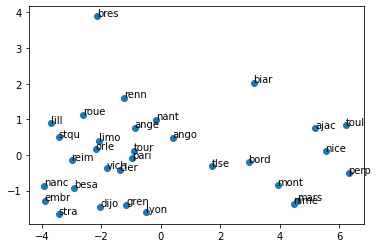

In [10]:
import matplotlib
plt.scatter(X_pca1[:, 0], X_pca1[:, 1])
for label, x, y in zip(labels1, X_pca1[:, 0], X_pca1[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

On pourrait supposer que l'axe X soit un axe Nord/Sud (ou froid/chaud) car il sépare les villes en fonction de leur température :

Une valeur négative pour les villes plutôt froides et une positive pour les villes plutôt chaudes par rapport à la moyenne des autres villes.

L'axe Y pourrait quand à lui être un indicateur des variations de températures au cours de l'année :

Une valeur négative indique de fortes variations de températures tandis qu'une positive indique un climat plus modéré

En regardant le vecteur array précédent, nous remarquons que les valeurs de l'hiver ont une influence positive sur l'axe Y tandis que les valeurs prises en été ont une influence négative.

In [11]:
# Question 3

In [12]:
# Crimes ####

In [13]:
data2 = pd.read_csv('./crimes.csv', sep=';')
X2 = data2.iloc[:, 1:8].values
labels2 = data2.iloc[:, 0].values

In [14]:
data2.head()

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


[0.58785136 0.17696026 0.10368809 0.04520458]


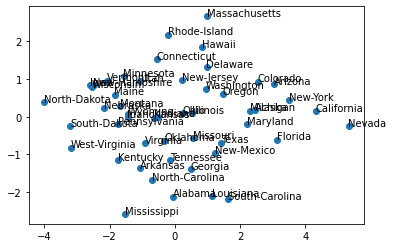

In [15]:
x2 = StandardScaler().fit_transform(X2)
pca2 = PCA(n_components=0.9)
X_pca2 = pca2.fit_transform(x2)
print(pca2.explained_variance_ratio_)
plt.scatter(X_pca2[:, 0], X_pca2[:, 1])
for label, x, y in zip(labels2, X_pca2[:, 0], X_pca2[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [16]:
pca2.components_

array([[ 0.30027916,  0.43175936,  0.39687549,  0.3966517 ,  0.44015721,
         0.35735953,  0.29517681],
       [-0.62917444, -0.16943512,  0.04224698, -0.34352815,  0.20334059,
         0.40231912,  0.50242093],
       [ 0.1782453 , -0.24419758,  0.49586087, -0.06950972, -0.20989509,
        -0.53923144,  0.56838373],
       [-0.23211411,  0.06221567, -0.55798926,  0.62980445, -0.05755491,
        -0.23488987,  0.41923832]])

Cette fois nous gardons donc 4 axes

Comme précédemment, la première composante serait une composante de taille, c'est-à-dire un indicateur sur l'intensité des crimes commis dans une ville. À droite les villes à forte criminalité, à gauche celles à faibles criminalité (par rapport à la moyenne).

La deuxième composante serait quant à elle une composante de forme, ici elle indiquerait la nature plus ou moins "grave" des crimes commis (en haut une forte intensité des crimes les moins graves et en bas ceux les plus graves).

Les deux composantes suivantes n'apportent pas grand chose.

In [17]:
# Question 4

In [18]:
# 50_Startups ####

In [19]:
data3 = pd.read_csv('./50_Startups.csv', sep=';')
X3 = data3.iloc[:, 1:5].values
labels3 = data3.iloc[:, 0].values
data3.head()

,Id,Depenses R&D,Depenses Administration,Depenses Marketing Spend,Benefice
0,1,165349.20,136897.80,471784.10,192261.83
1,2,162597.70,151377.59,443898.53,191792.06
2,3,153441.51,101145.55,407934.54,191050.39
3,4,144372.41,118671.85,383199.62,182901.99
4,5,142107.34,91391.77,366168.42,166187.94


[0.66804393 0.25484695]


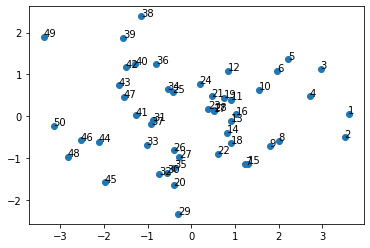

In [20]:
x3 = StandardScaler().fit_transform(X3)
pca3 = PCA(n_components=0.9)
X_pca3 = pca3.fit_transform(x3)
print(pca3.explained_variance_ratio_)
plt.scatter(X_pca3[:, 0], X_pca3[:, 1])
for label, x, y in zip(labels3, X_pca3[:, 0], X_pca3[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [21]:
pca3.components_

array([[ 0.59347855,  0.14737886,  0.52064694,  0.59580992],
       [-0.04048087, -0.95051314,  0.30797098,  0.00632069]])

Ici nous gardons deux axes

La première composante peut être interprétée comme un indicateur de performance globale de l'entreprise : chaque variable lui est corrélée positivement. Ici aussi c'est donc une composante de taille.

La seconde composante est quand à elle une composante de forme : elle indique la stratégie de l'entreprise avec en bas les entreprises axées R&D ou administration tandis qu'en haut seront représentées celles qui s'orientent plutôt vers le marketing.

# II. Clustering ####

In [22]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score

In [23]:
# Question 1

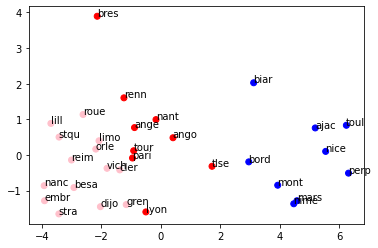

In [24]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x1)
clustering = kmeans.predict(x1)

colors = ['red','blue','pink']
plt.scatter(X_pca1[:, 0], X_pca1[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels1, X_pca1[:, 0], X_pca1[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [25]:
score1 = metrics.silhouette_score(x1, clustering,metric='euclidean')
print(f'Score avec Kmeans : {score1}')

Score avec Kmeans : 0.38592443493051315


In [26]:
# Question 2

In [27]:
# AC ward ####

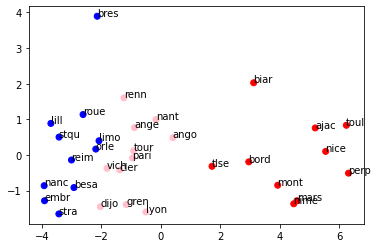

In [28]:
ACw = AgglomerativeClustering(n_clusters=3,linkage='ward')
clustering = ACw.fit_predict(x1)

colors = ['red','blue','pink']
plt.scatter(X_pca1[:, 0], X_pca1[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels1, X_pca1[:, 0], X_pca1[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [29]:
score2 = metrics.silhouette_score(x1, clustering,metric='euclidean')
print(f'Score avec AgglomerativeClustering Ward : {score2}')

Score avec AgglomerativeClustering Ward : 0.36807826080005457


In [30]:
# AC average ####

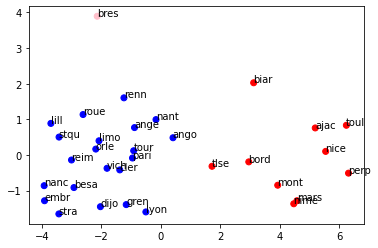

In [31]:
ACa = AgglomerativeClustering(n_clusters=3,linkage='average')
clustering = ACa.fit_predict(x1)

colors = ['red','blue','pink']
plt.scatter(X_pca1[:, 0], X_pca1[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels1, X_pca1[:, 0], X_pca1[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [32]:
score3 = metrics.silhouette_score(x1, clustering,metric='euclidean')
print(f'Score avec AgglomerativeClustering Average : {score3}')

Score avec AgglomerativeClustering Average : 0.49568744626910916


In [33]:
# Question 3

In [37]:
#?metrics.silhouette_score

Documentation sur le score

The Silhouette Coefficient is calculated using the mean intra-cluster
distance (``a``) and the mean nearest-cluster distance (``b``) for each
sample.  The Silhouette Coefficient for a sample is ``(b - a) / max(a,
b)``.  To clarify, ``b`` is the distance between a sample and the nearest
cluster that the sample is not a part of.
Note that Silhouette Coefficient is only defined if number of labels
is ``2 <= n_labels <= n_samples - 1``.

This function returns the mean Silhouette Coefficient over all samples.
To obtain the values for each sample, use :func:`silhouette_samples`.

The best value is 1 and the worst value is -1. Values near 0 indicate
overlapping clusters. Negative values generally indicate that a sample has
been assigned to the wrong cluster, as a different cluster is more similar.

Nous cherchons à obtenir une distance maximale entre chaque point et le cluster le plus proche dont il ne fait pas partie, ainsi qu'une distance minimale entre les points d'un même cluster.

In [34]:
for i in np.arange(2, 6):
    clustering = KMeans(n_clusters=i).fit_predict(x1)
    print(metrics.silhouette_score(X1, clustering,metric='euclidean'))
    print()

0.6181156437258195

0.3997417097231568

0.35300577123355753

0.3131361411020844



La meilleure partition est la première c'est-à-dire celle pour obtenir 2 classes

In [35]:
# Question 4

In [36]:
print(f'Score avec Kmeans : {score1}\nScore avec AggloClustering Ward : {score2}\nScore avec AggloClustering Average :{score3}')

Score avec Kmeans : 0.38592443493051315
Score avec AggloClustering Ward : 0.36807826080005457
Score avec AggloClustering Average :0.49568744626910916


Ainsi le meilleur algo est le troisième (AggloClustering Average) avec une accuracy d'environ 0.496